In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import average_precision_score

# **Pré-taritement des Datasets**

Dans ce notebook, on va utiliser les datasets pré-tarités.
Le pré-traitement consiste à alléger le nombre des colonnes et ne conserver que les plus pertinentes. Ceci en faisant une étude sur les marques, les catégories, les items et les prix


In [3]:
# loading the dataset to a Pandas DataFrame
data_X = pd.read_csv('/content/X_BNP_simplif.csv')

In [4]:
# loading the dataset to a Pandas DataFrame
data_Y = pd.read_csv('/content/Y_train_2_XPXJDyy.csv')

# **Machine learning : Logistic regression**

# 1- Logistic regression sans under-sampling

In [5]:
X_train, X_test, Y_train, Y_test = train_test_split(data_X, data_Y, test_size=0.2,  random_state=2)

In [6]:
model = LogisticRegression()

In [7]:
Y_train.head()

,index,ID,fraud_flag
77240,77240,50922,0
23423,23423,63667,0
45951,45951,8950,0
23481,23481,48707,0
70452,70452,100353,0


In [8]:
Y_test = Y_test.drop("ID", axis = 1)

In [9]:
Y_test = Y_test.drop("index", axis = 1)

In [10]:
Y_train = Y_train.drop("ID", axis = 1)

In [11]:
Y_train = Y_train.drop("index", axis = 1)

In [12]:
# training the Logistic Regression Model with Training Data
model.fit(X_train, Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [13]:
# accuracy on training data
Y_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(Y_train_prediction, Y_train)

In [14]:
print('Accuracy on Training data : ', training_data_accuracy)

Accuracy on Training data :  0.9857204440133636


In [15]:
# accuracy on test data
Y_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(Y_test_prediction, Y_test)

In [16]:
print('Accuracy score on Test Data : ', test_data_accuracy)

Accuracy score on Test Data :  0.9860437547149478


In [17]:
from sklearn.metrics import average_precision_score

average_precision = average_precision_score(Y_test,Y_test_prediction)
print(average_precision)

0.013956245285052269


# 2- Logistic regression avec under-sampling

In [18]:
merged_data = pd.merge(data_X, data_Y, on='ID')

In [19]:
# distribution of legit transactions & fraudulent transactions
merged_data['fraud_flag'].value_counts()

0    91471
1     1319
Name: fraud_flag, dtype: int64

In [20]:
# separating the data for analysis
legit = merged_data[merged_data.fraud_flag == 0]
fraud = merged_data[merged_data.fraud_flag == 1]

In [32]:
legit_sample = legit.sample(n=10*1319)

In [33]:
new_dataset = pd.concat([legit_sample, fraud], axis=0)

In [34]:
X = new_dataset.drop(columns='fraud_flag', axis=1)
Y = new_dataset['fraud_flag']

In [35]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2,  random_state=2)

In [36]:
# training the Logistic Regression Model with Training Data
model.fit(X_train, Y_train)

LogisticRegression()

In [37]:
# accuracy on training data
Y_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(Y_train_prediction, Y_train)

In [38]:
print('Accuracy on Training data : ', training_data_accuracy)

Accuracy on Training data :  0.9115189110019816


In [39]:
# accuracy on test data
Y_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(Y_test_prediction, Y_test)

In [40]:
print('Accuracy score on Test Data : ', test_data_accuracy)

Accuracy score on Test Data :  0.8993797381116472


In [41]:
from sklearn.metrics import average_precision_score

average_precision = average_precision_score(Y_test,Y_test_prediction)
print(average_precision)

0.10062026188835287


In [42]:
import matplotlib.pyplot as plt
from sklearn.metrics import recall_score

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

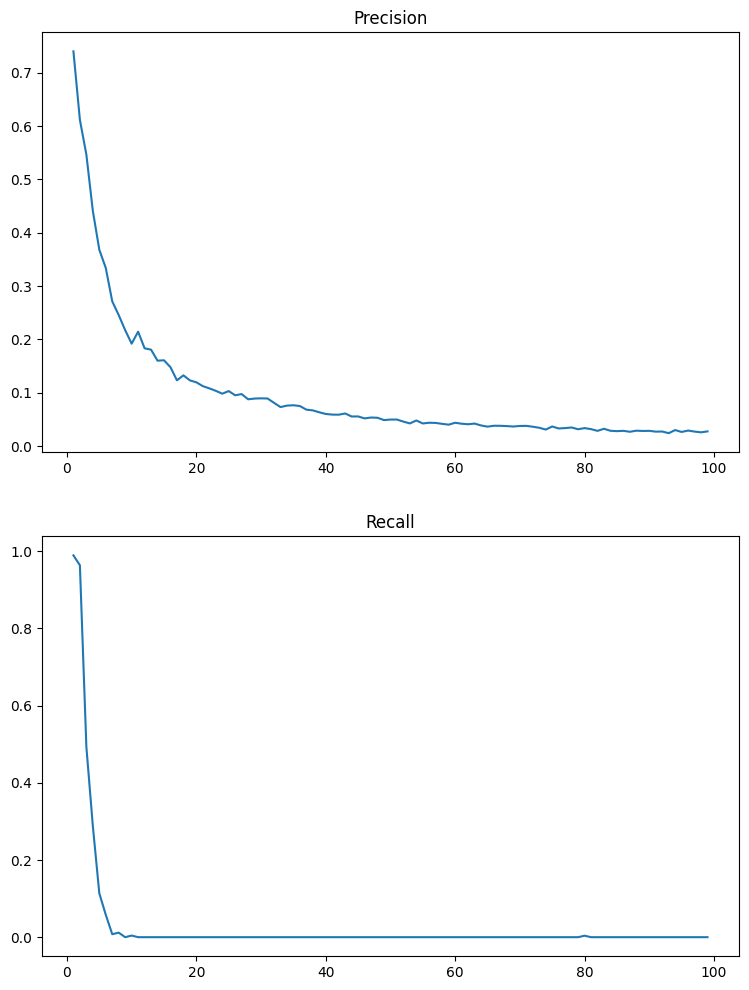

In [43]:
Precision=[]
ratios=[]
Recall= []
for i in range(1,100):
  ratios.append(i)
  legit_sample = legit.sample(n=i*492)
  new_dataset = pd.concat([legit_sample, fraud], axis=0)
  X = new_dataset.drop(columns='fraud_flag', axis=1)
  Y = new_dataset['fraud_flag']
  X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2,  random_state=2)
  # training the Logistic Regression Model with Training Data
  model.fit(X_train, Y_train)
  Y_test_prediction = model.predict(X_test)
  average_precision = average_precision_score(Y_test,Y_test_prediction)
  recall = recall_score(Y_test, Y_test_prediction)
  Recall.append(recall)
  Precision.append(average_precision)
fig = plt.figure(figsize=(9, 12))
axs = fig.subplots(2, 1)

axs[0].plot(ratios,Precision)
axs[0].set_title('Precision')
axs[1].plot(ratios,Recall)
axs[1].set_title('Recall')
plt.show()



